# GTI770 - Systèmes Intelligents et Apprentissage Machine

### Alessandro L. Koerich

## Notebook Jupyter - 8_RNA_MLP_11Classes

##### Ver.1: July 2018
##### Ver.2: March 2019

### New Modules to Install:

* Open a Windows / Linux / MacOS terminal
* Activate the conda environment by issuing the following command:
##### C:> activate gti770  or  source activate gti770

* Your prompt should change

* Install these two modules using pip install:
##### (gti770) pip install neptune-cli
##### (gti770) pip install livelossplot

In [1]:
# Imports
import numpy as np
import time

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Imports from KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.utils import np_utils
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [4]:
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.callbacks import TensorBoard

In [5]:
# Imports from TENSOR FLOW
import tensorflow as tf

In [6]:
# Testing the installation of Tensor Flow
hello = tf.constant('Hello, TensorFlow!')
hello = tf.constant('Hello, TensorFlow!')
sess  = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [7]:
####### ATTENTION ######
# This part of the code is problematic and it may or may not work
# If you get stucked here during an execution, you must comment the last line of this cell # TB()
# The workaround is to open a terminal and run tensorboard in background....
#
# Open a Windows / Linux / MacOS terminal
#
# Activate the conda environment by issuing the following command:
# Windows terminal:
# C:> activate gti770
# (gti770)C:>  # Your prompt should change
# 
# Linux terminal / MacOS terminal:
# $ source activate gti770
# (gti770)$  # Your prompt should change
# Run Tensorboard in background by issuing the following command:
#(gti770)$ tensorboard --logdir="logs" &
# 
# Keep the terminal open and open a new tab in your brownser and type the address: http://127.0.0.1:6006

def TB(cleanup=False):
    import webbrowser
    webbrowser.open('http://127.0.0.1:6026')

    !tensorboard --logdir="logs"

    if cleanup:
        !rm -R logs/
TB()

/bin/sh: tensorboard: command not found


In [8]:
# Code for avoiding keras + tensorflow from using all memory:
# Similar to the solution above, but also need to manually setup the session on Keras back-end:
import tensorflow as tf
# config = tf.ConfigProto(device_count = {'GPU': 2})
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import keras.backend.tensorflow_backend as tf_bkend
tf_bkend.set_session(sess)
####################

In [9]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [10]:
# Load TRAIN, TEST, UNKNOWN CLASS data from files
# Numeric inputs and outputs
# load data from file

rnaNNSTrainData = np.loadtxt('CSV_Files/rnaNNSTrain.csv', delimiter=' ', dtype=np.str)
rnaNNSValidData = np.loadtxt('CSV_Files/rnaNNSValid.csv', delimiter=' ', dtype=np.str)

# Separate inputs (features) from outputs (labels)
# last 11 columns = class labels (one-hot-encoding)

Xtrain = rnaNNSTrainData[0:183,0:42].astype(np.float)
Ytrain = rnaNNSTrainData[0:183,42:53].astype(np.int)

Xvalid = rnaNNSValidData[0:163,0:42].astype(np.float)
Yvalid = rnaNNSValidData[0:163,42:53].astype(np.int)

In [11]:
Xtrain
# 42 columns = inputs

array([[0.443478, 0.06735 , 0.777983, ..., 0.551845, 0.549144, 0.549144],
       [0.290881, 0.09395 , 0.871281, ..., 0.869442, 0.872507, 0.872507],
       [0.335478, 0.156931, 0.624809, ..., 0.649906, 0.664052, 0.664052],
       ...,
       [0.377061, 0.372347, 0.557439, ..., 0.473047, 0.446275, 0.446275],
       [0.404909, 0.152636, 0.721557, ..., 0.414884, 0.384352, 0.384352],
       [0.564511, 0.494883, 0.314939, ..., 0.281042, 0.298986, 0.298986]])

In [12]:
Ytrain
# 11 columns = outputs

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [13]:
num_classes = Ytrain.shape[1]
input_dim   = Xtrain.shape[1]

In [14]:
input_dim

42

In [15]:
num_classes

11

In [16]:
def twolayer_model():
    print("Two-Layer NN\n")
    # create model
    model = Sequential()
    model.add(Dense(output_dim=num_classes, input_dim=input_dim))
    model.add(Activation('sigmoid'))
    model.summary()

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
    return model

In [21]:
def threelayer_model():
    # create model
    print("Three-Layer NN with 50 hidden neurons\n")
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim))
    model.add(Activation('sigmoid'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.summary()

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
    return model

In [ ]:
def fourlayer_model():
    # create model
    print("Four-Layer NN with 100 and hidden neurons\n")
    model = Sequential()
    model.add(Dense(100, input_dim=input_dim))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.summary()

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
    return model

In [22]:
# Build the model
# Choose one at each time

# model = twolayer_model()
model = threelayer_model()
# model = fourlayer_model()

# Choose the number of learning cycles and the batch size
num_cycles = 5000
mini_batch = 183

Three-Layer NN with 50 hidden neurons

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                2150      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 11)                561       
_________________________________________________________________
activation_3 (Activation)    (None, 11)                0         
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Create variables to Tensorboard tracing
now = time.strftime("%c")
tbcallback = TensorBoard(log_dir='./logs/'+now, histogram_freq=0, write_graph=True, write_images=True )

In [24]:
# Create a checkpoint to store the best model 

from keras.callbacks import ModelCheckpoint
from livelossplot    import PlotLossesKeras

# Checkpoints 
filepath   = "weights_RNA_MLP_11.best.hdf5"
print( filepath )

checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max') 

callbacks_list = [tbcallback, checkpoint, PlotLossesKeras()]

weights_RNA_MLP_11.best.hdf5


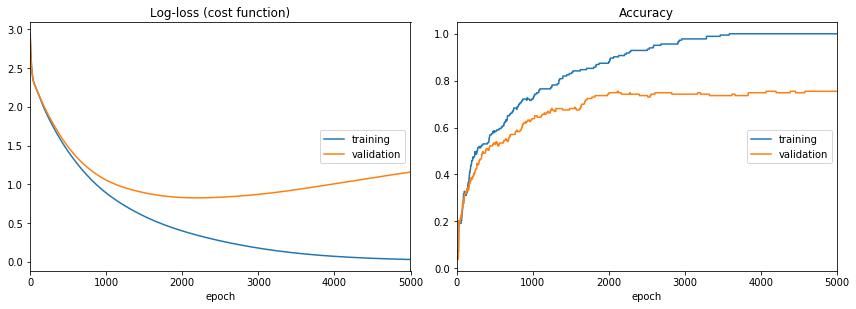

Log-loss (cost function):
training   (min:    0.028, max:    2.943, cur:    0.028)
validation (min:    0.824, max:    2.913, cur:    1.157)

Accuracy:
training   (min:    0.044, max:    1.000, cur:    1.000)
validation (min:    0.037, max:    0.755, cur:    0.755)


In [25]:
# Fit the model (TRAIN)
model.fit(Xtrain, Ytrain, validation_data=(Xvalid, Yvalid),
          epochs=num_cycles, batch_size=mini_batch, callbacks=callbacks_list )

In [ ]:
# Final evaluation of the model (On the Training, Validation or Test dataset)
scores = model.evaluate(Xvalid, Yvalid, verbose=0)
print("Error on the validation dataset: %.2f%%" % (100-scores[1]*100))
scores = model.evaluate(Xtrain, Ytrain, verbose=0)
print("Error on the training dataset: %.2f%%" % (100-scores[1]*100))

In [ ]:
def get_confusion_matrix_one_hot(model_results, truth):
    '''model_results and truth should be for one-hot format, i.e, have >= 2 columns,
    where truth is 0/1, and max along each row of model_results is model result
    '''
    assert model_results.shape == truth.shape
    num_outputs = truth.shape[1]
    confusion_matrix = np.zeros((num_outputs, num_outputs), dtype=np.int32)
    predictions = np.argmax(model_results,axis=1)
    assert len(predictions)==truth.shape[0]

    for actual_class in range(num_outputs):
        idx_examples_this_class = truth[:,actual_class]==1
        prediction_for_this_class = predictions[idx_examples_this_class]
        for predicted_class in range(num_outputs):
            count = np.sum(prediction_for_this_class==predicted_class)
            confusion_matrix[actual_class, predicted_class] = count
    assert np.sum(confusion_matrix)==len(truth)
    assert np.sum(confusion_matrix)==np.sum(truth)
    return confusion_matrix

In [ ]:
# Predict and show the confusion matrix (For the Validation dataset)
predict = model.predict(Xvalid)
confusion_matrix = get_confusion_matrix_one_hot(predict, Yvalid)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "ABCDEFGHIJK"], columns = [i for i in "ABCDEFGHIJK"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
print("Notebook ended")